In [3]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [4]:
# songid 입력시 가수, 제목, 장르, 가사 반환하는 함수
def song_info(songid):
    
    headers = {'User-Agent' : 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/98.0.4758.102 Safari/537.36'}
    url2=f'https://www.genie.co.kr/detail/songInfo?xgnm={songid}'
    html2= requests.get(url2,headers=headers)
    soup2= BeautifulSoup(html2.text, 'html.parser')
        
    try:
            
        # 가수
        artist=soup2.find_all('span', {'class':"value"})[0].text
        # 제목
        title=soup2.find('pre',{'id':"pLyrics"}).find('div').text.split('-')[0].strip()
        # 장르
        genre=soup2.find_all('span', {'class':"value"})[2].text
        # 가사
        lyric=soup2.find('pre',{'id':"pLyrics"}).find('p').text.replace('\r','').replace('\t','').replace('\n\n','\n').replace('\n',' ')
        
        return [artist, title, genre, lyric]
        
    except:
        
        # 가수
        artist=soup2.find_all('span', {'class':"value"})[0].text
        # 제목
        title=' '.join(soup2.find('h2',{'class':'name'}).text.split()[1:])
        # 장르
        genre=soup2.find_all('span', {'class':"value"})[2].text
         
        return [artist, title, genre, '']
    

In [5]:
# 당해 ~50위 까지 숫자 카운트
def page_info(year):
    headers = {'User-Agent' : 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/98.0.4758.102 Safari/537.36'}
    url=f'https://www.genie.co.kr/chart/musicHistory?year={year}&category=0'
    html = requests.get(url,headers=headers)
    soup = BeautifulSoup(html.text, 'html.parser')
    count=len(soup.find('tbody').find_all('tr'))
    return count

# 연도, 순위 입력시 songid 반환
def song_id(year,num):
    
    headers = {'User-Agent' : 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/98.0.4758.102 Safari/537.36'}
    url=f'https://www.genie.co.kr/chart/musicHistory?year={year}&category=0'
    html= requests.get(url,headers=headers)
    soup= BeautifulSoup(html.text, 'html.parser')
    songid=soup.find('tbody').find_all('tr')[num-1].attrs['songid']
    return songid

In [6]:
# 1년 리스트만들기

# lyric_list=[]
# title_list=[]
# artist_list=[]
# genre_list=[]

# for i in range(page_info(2010)):
#     info=song_info(song_id(2010,i+1))
#     artist_list.append(info[0])
#     title_list.append(info[1])
#     genre_list.append(info[2])
#     lyric_list.append(info[3])


In [7]:
# df=pd.DataFrame({'가수':artist_list,'제목':title_list,'장르':genre_list,'가사':lyric_list})
# df.to_csv('2010.csv',encoding='utf-8',index=False)

In [8]:
# 10년반복
# for i in range(10):
        
#     lyric_list=[]
#     title_list=[]
#     artist_list=[]
#     genre_list=[]

#     for j in range(page_info(2010+i)):
#         info=song_info(song_id(2010+i,j+1))
#         artist_list.append(info[0])
#         title_list.append(info[1])
#         genre_list.append(info[2])
#         lyric_list.append(info[3])
        
#     df=pd.DataFrame({'가수':artist_list,'제목':title_list,'장르':genre_list,'가사':lyric_list})
#     df.to_csv(f'{2010+i}.csv',encoding='utf-8',index=False)

In [9]:
# 10년가사

# for i in range(10):
#     with open(f'lyric{2010+i}.txt','w',encoding='utf-8') as f:
#         for j in range(page_info(2010+i)):
#             info=song_info(song_id(2010+i,j+1))
#             f.write(info[3]+'\n')
        


In [10]:
# 1년 장르
# for i in range(1):
        
#     genre_list=[]

#     for j in range(page_info(2010+i)):
#         info=song_info(song_id(2010+i,j+1))
#         genre_list.append(info[2])


In [11]:
genre_all=[]
df=pd.read_csv('2010.csv',encoding='utf-8')
df2=df['장르'].apply(lambda x: x.split(' / '))
for i in range(len(df2)):
    genre_all.append(df2[i][0])
    genre_all.append(df2[i][1])

In [12]:
# 장르 종류
# genre=[]
# for i in range(len(df['장르'].unique())):
#     genre_i=df['장르'].unique()[i].split(' / ')
#     genre.append(genre_i[0])
#     genre.append(genre_i[1])
    
# genre_uni=list(set(genre))

In [13]:
# 장르종류
genre_uni=list(set(genre_all))
genre_uni.sort()
genre_uni

['OST', 'R&B/소울', '가요', '댄스', '드라마', '락', '랩/힙합', '발라드', '전체']

In [14]:
# 모든 장르 리스트
# genre_all=[]
# for i in range(len(df['장르'])):
#     genre_i=df['장르'][i].split(' / ')
#     genre_all.append(genre_i[0])
#     genre_all.append(genre_i[1])
    
# genre_all

In [15]:
# for i in genre_uni:
#     count=0
#     for j in genre_all:
#         if i==j:
#             count+=1
#         else:
#             pass
#     print(f'{i}:{count}')

In [16]:
for i in genre_uni:
    print(f'{i} : {genre_all.count(i)}')
    

OST : 3
R&B/소울 : 5
가요 : 47
댄스 : 16
드라마 : 3
락 : 2
랩/힙합 : 4
발라드 : 16
전체 : 4


In [17]:
# 10년 장르
genre_all=[]
for i in range(10):
    df=pd.read_csv(f'{2010+i}.csv',encoding='utf-8')
    df2=df['장르'].apply(lambda x: x.split(' / '))
    for i in range(len(df2)):
        genre_all.append(df2[i][0])
        genre_all.append(df2[i][1])
genre=list(set(genre_all))
genre.sort()
genre


['OST',
 'R&B/소울',
 '가요',
 '댄스',
 '드라마',
 '락',
 '랩/힙합',
 '발라드',
 '블루스/포크',
 '인디',
 '일렉트로니카',
 '전체']

In [18]:
genre_df=pd.DataFrame(genre)
for i in genre_df[0]:
    print(i)
genre_df=genre_df.set_index(0)
genre_df.index

OST
R&B/소울
가요
댄스
드라마
락
랩/힙합
발라드
블루스/포크
인디
일렉트로니카
전체


Index(['OST', 'R&B/소울', '가요', '댄스', '드라마', '락', '랩/힙합', '발라드', '블루스/포크', '인디',
       '일렉트로니카', '전체'],
      dtype='object', name=0)

In [19]:

for i in range(10):
    genre_all=[]
    df=pd.read_csv(f'{2010+i}.csv',encoding='utf-8')
    
    df2=df['장르'].apply(lambda x: x.split(' / '))
    
    for j in range(len(df2)):
        genre_all.append(df2[j][0])
        genre_all.append(df2[j][1])
    
        for z in genre_df.index:
            genre_df.loc[z,[2010+i]]=genre_all.count(z)
genre_df

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,,,,,,,,,,
OST,3.0,2.0,1.0,5.0,8.0,1.0,8.0,6.0,2.0,6.0
R&B/소울,5.0,2.0,4.0,4.0,5.0,7.0,10.0,5.0,5.0,2.0
가요,47.0,48.0,49.0,45.0,41.0,49.0,42.0,44.0,48.0,44.0
댄스,16.0,22.0,18.0,18.0,14.0,17.0,17.0,14.0,20.0,5.0
드라마,3.0,1.0,1.0,5.0,8.0,1.0,8.0,6.0,2.0,6.0
락,2.0,0.0,5.0,3.0,0.0,4.0,0.0,0.0,0.0,3.0
랩/힙합,4.0,2.0,5.0,9.0,8.0,15.0,7.0,6.0,9.0,5.0
발라드,16.0,13.0,12.0,5.0,10.0,5.0,6.0,10.0,9.0,23.0
블루스/포크,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [20]:
genre_df=genre_df.T
genre_df

,OST,R&B/소울,가요,댄스,드라마,락,랩/힙합,발라드,블루스/포크,인디,일렉트로니카,전체
2010,3.0,5.0,47.0,16.0,3.0,2.0,4.0,16.0,0.0,0.0,0.0,4.0
2011,2.0,2.0,48.0,22.0,1.0,0.0,2.0,13.0,0.0,2.0,0.0,8.0
2012,1.0,4.0,49.0,18.0,1.0,5.0,5.0,12.0,0.0,0.0,0.0,5.0
2013,5.0,4.0,45.0,18.0,5.0,3.0,9.0,5.0,0.0,0.0,0.0,6.0
2014,8.0,5.0,41.0,14.0,8.0,0.0,8.0,10.0,1.0,0.0,0.0,3.0
2015,1.0,7.0,49.0,17.0,1.0,4.0,15.0,5.0,0.0,0.0,0.0,1.0
2016,8.0,10.0,42.0,17.0,8.0,0.0,7.0,6.0,0.0,1.0,0.0,1.0
2017,6.0,5.0,44.0,14.0,6.0,0.0,6.0,10.0,1.0,8.0,0.0,0.0
2018,2.0,5.0,48.0,20.0,2.0,0.0,9.0,9.0,0.0,4.0,1.0,0.0
2019,6.0,2.0,44.0,5.0,6.0,3.0,5.0,23.0,0.0,5.0,1.0,0.0


In [21]:
import matplotlib.pyplot as plt
import platform

In [38]:
# 한글 글꼴
if(platform.system() == 'Windows'):
    plt.rc('font', family = 'Malgun Gothic')

else:
    plt.rc('font', family = 'AppleGothic')

In [31]:
genre_df_gra=genre_df.T.drop(['가요','OST']).T

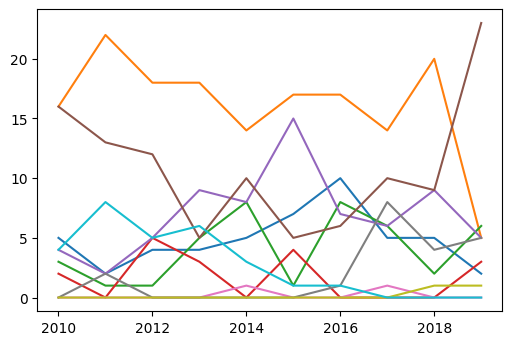

In [34]:
plt.figure(dpi=100)
plt.axis(True)
plt.plot(genre_df_gra)

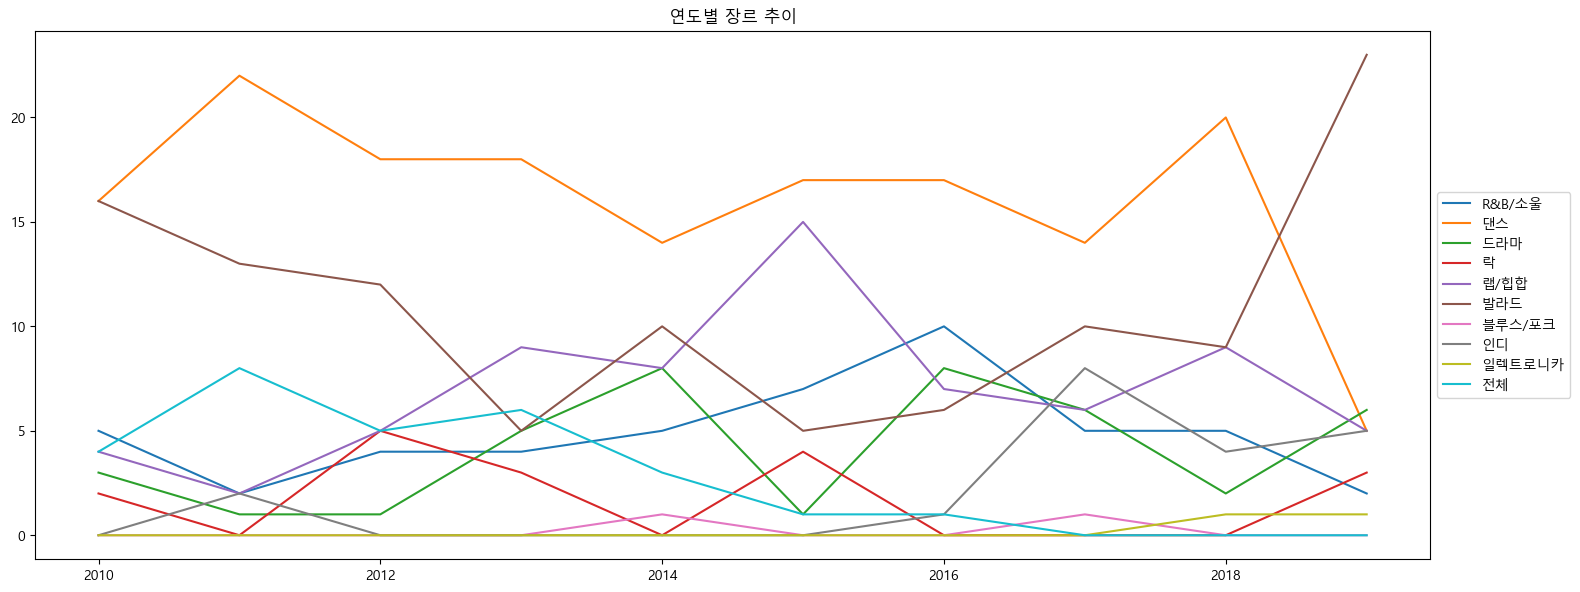

In [58]:
plt.figure(dpi=100,figsize=(18,7))
# plt.xticks(rotation=70)
plt.title("연도별 장르 추이")

plt.plot(genre_df_gra)

plt.legend(genre_df_gra.columns,loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [50]:
genre_df_gra.columns

Index(['R&B/소울', '댄스', '드라마', '락', '랩/힙합', '발라드', '블루스/포크', '인디', '일렉트로니카',
       '전체'],
      dtype='object', name=0)